# WEEK_03

## 1. 데이터 스케일링 변환

- Scaler 객체를 이용해 변환
    - fit() : 데이터 변환을 위한 기준 정보를 설정함 (ex : 최댓값 / 최솟값 설정 등)
    - transform() : 설정된 정보를 이용해 데이터를 변환
    - fit_transform() : fit 과 transform을 한번에 적용
- 변환 시 유의할 점
    - 학습 / 테스트 데이터 세트에 변환 시 학습 데이터에 fit() 한 동일한 스케일러로 테스트 데이터에 적용해야 한다.
        
        → 만약 테스트 데이터에 새로 fit()한 스케일러로 예측을 수행하게 되면 학습 데이터와 테스트 데이터의        스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측결과를 도출하지 못할 수 있음.
        
- Scaler class의 fit(), transform()은 2차원 이상 데이터만 가능함.

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# data 2차원 reshape
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환 
scaler = MinMaxScaler()

# fit -> min=0, max=10
scaler.fit(train_array)

# transform -> 원본 10->1로 변경됨, 1/10 scale로 테스트 데이터 변환
train_scaled = scaler.transform(train_array)

print('original train data:{}'.format(train_array.reshape(-1),2))
print('scaled train data:{0}'.format(train_scaled.reshape(-1),2))


original train data:[ 0  1  2  3  4  5  6  7  8  9 10]
scaled train data:[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [2]:
# test data로 새로 fit 한 후에 transform 한 경우
# 값이 달라짐
scaler.fit(test_array)
test_scaled = scaler.transform(test_array)

print('original test data:{}'.format(test_array.reshape(-1),2))
print('scaled test data:{}'.format(test_scaled.reshape(-1),2))

original test data:[0 1 2 3 4 5]
scaled test data:[0.  0.2 0.4 0.6 0.8 1. ]


In [3]:
# 동일한 scaler로 transform 한 경우
# 값이 동일하다
scaler = MinMaxScaler()

scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
test_scaled = scaler.transform(test_array)

print('original train data:{}'.format(train_array.reshape(-1),2))
print('scaled train data:{0}'.format(train_scaled.reshape(-1),2))
print('original test data:{}'.format(test_array.reshape(-1),2))
print('scaled test data:{}'.format(test_scaled.reshape(-1),2))

original train data:[ 0  1  2  3  4  5  6  7  8  9 10]
scaled train data:[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
original test data:[0 1 2 3 4 5]
scaled test data:[0.  0.1 0.2 0.3 0.4 0.5]


- fit_transform()을 적용할 때도 동일함

### - 데이터 스케일링 시 유의점 요약
1. 가능하다면 전체 데이터의 스케일링 변환을 적용 한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit이나 fit_transform을 적용하지 않고 학습 데이터로 fit한 scaler를 이용해 transform한다.

## 2. 사이킷런으로 수행하는 타이타닉 생존자 예측
Task : kaggle에서 제공하는 타이타닉 탑승자 데이터를 기반으로 생존자 예측하기

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data 살펴보기
titanic_df = pd.read_csv('./data/train.csv')
display(titanic_df.head())
print('\n ### Data information ### \n')
print(titanic_df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



 ### Data information ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- Data info
1. Passengerid : 탑승자 데이터 일련 번호
2. survived : 생존 여부, 0=사망, 1=생존
3. pclass : 티켓의 선실 등급, 1=일등석 2=이등석 3=삼등석
4. sex : 탑승자 성별
5. name : 탑승자 이름
6. age : 탑승자 나이
7. sibsp : 같이 탑승한 형제자매 또는 배우자 인원 수
8. parch : 같이 탑승한 부모님 또는 어린이 인원수
9. ticket : 티켓 번호
10. fare : 요금
11. cabin : 선실 번호
12. embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S= Southampton

 -> pandas의 object 타입은 string타입으로 봐도 무방

- 사이킷런 머신러닝 알고리즘은 NULL값을 허용하지 않으므로 처리가 필요함. -> 여기서는 fillna()함수 이용

In [5]:
titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Cabin'].fillna('N')
titanic_df['Embarked'].fillna('N')
print('Num of NULL :', titanic_df.isnull().sum().sum())

Num of NULL : 866


- Data 분포 확인 (Sex, Cabin, Embarked) <- string

In [6]:
print('SEX 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

SEX 값 분포 : 
 Sex
male      577
female    314
Name: count, dtype: int64

Cabin 값 분포 : 
 Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

Embarked 값 분포 : 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [7]:
# Cabin column 앞 글자만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
display(titanic_df['Cabin'].head())

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

### - 머신러닝 학습, 예측 전에 데이터 특성 파악하기
- 어떤 승객이 생존확률이 높을까?
    - 우선 구조 대상 (Women and children first) 그 다음 부자나 유명인이 구조 대상이었을 것
    - 삼등실에 탄 가난한 사람들은 많이 사망했을 것임.

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


<Axes: xlabel='Sex', ylabel='Survived'>

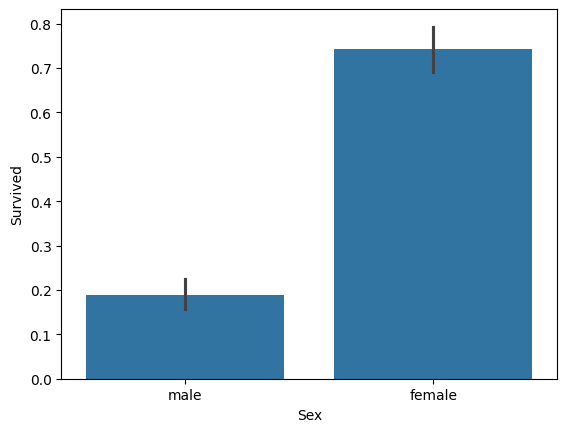

In [8]:
print(titanic_df.groupby(['Sex','Survived'])['Survived'].count())

# seaborn 이용해 데이터 시각회
# seaborn - dataframe과 쉽게 연동, 많이 쓰인다
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

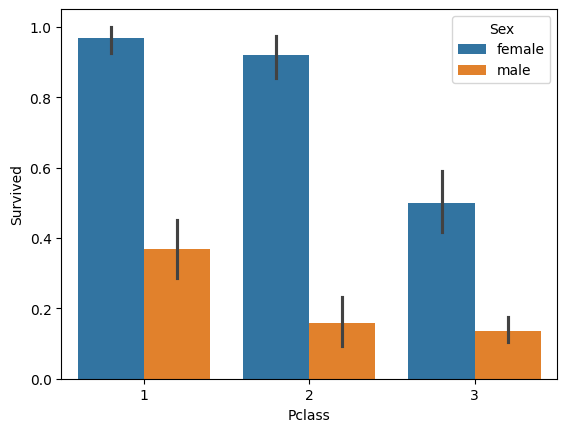

In [9]:
sns.barplot(x='Pclass',y='Survived', hue='Sex', data=titanic_df)

### Age에 따른 category 분류 하기
- 0~5 : Baby
- 6~12 : Child
- 13~18 : Teenager
- 19~25 : Student
- 26~35 : Young Adult
- 36~60 : Adult
- 61 ~ : Elderly
- ~ -1 : Unknown

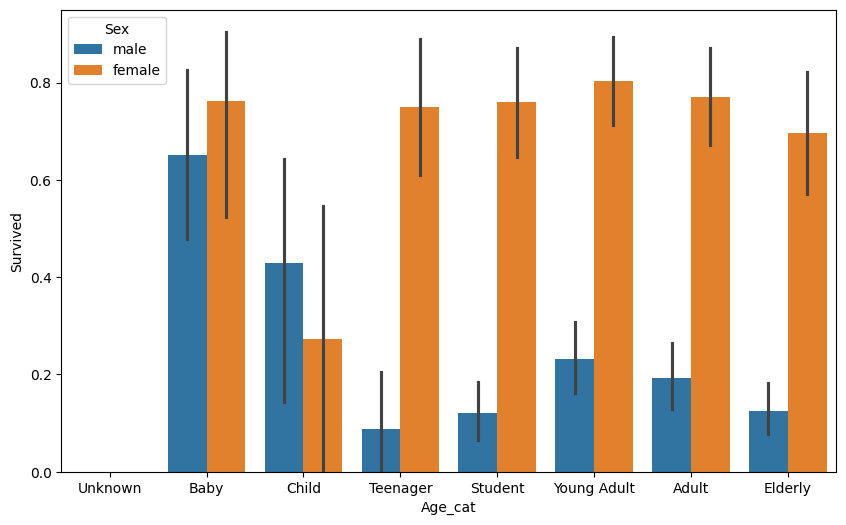

In [10]:
def get_category(age):
    cat = ''
    if age <= -1: cat = "Unknown"
    elif age <= 5: cat = "Baby"
    elif age <= 12: cat = "Child"
    elif age <= 18: cat = "Teenager"
    elif age <= 25: cat = "Student"
    elif age <= 35: cat = "Young Adult"
    elif age <= 60: cat = "Adult"
    else: cat = "Elderly"

    return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown', 'Baby','Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop(['Age_cat'], axis=1, inplace=True)


### 문자열 피처 인코딩하기 -> LabelEncoder class 이용
- 문자열은 그대로 학습에 이용할 수 없기 때문에 인코딩이 필요하다

In [11]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF 

titanic_df = encode_features(titanic_df)
display(titanic_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2


### - 전체 preprocessing 함수로 만들기
- 전체 파이프라인 호출 함수 transform_features()

In [29]:
# NUll 처리 함수
def fillna(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] =df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')
    df['Fare'] = df['Fare'].fillna(0)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 실행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])

    return df 

# 전체 파이프라인 호출 함수
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df
    

### - 데이터 로드 및 전처리 실행, 피처 - 레이블 데이터 셋 추출

In [30]:
titanic_df = pd.read_csv('./data/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(['Survived'],axis=1)

X_titanic_df = transform_features(X_titanic_df)

### - Data split (train , test)

In [35]:
# data split (train, test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size= 0.2, random_state=11)
print(X_train.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64


### - ML 알고리즘 (결정트리, 랜덤 포레스트, 로지스틱 회귀)을 이용해 타이타닉 생존자 예측

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. class 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=1000)

# 2. 각각 학습 / 예측 / 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier Accuracy : {0:.4f}".format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier Accuracy : {0:.4f}".format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression Accuracy : {0:.4f}".format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier Accuracy : 0.7877
RandomForestClassifier Accuracy : 0.8547
LogisticRegression Accuracy : 0.8492


### - 최적 알고리즘을 찾기 위해 교차검증으로 평가해보기
1. KFold
2. cross_val_score
3. GridSearchCV

In [ ]:
# 1. KFold
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트 = 5, 객체 생성
    kfold = KFold(n_splits=5)

    scores = []

    #KFold 교차검증
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # 학습/검증 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        #Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

    # 평균 score 계산
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))

# 호출
exec_kfold(dt_clf, folds=5)


교차검증 0 정확도: 0.7542
교차검증 1 정확도: 0.7809
교차검증 2 정확도: 0.7865
교차검증 3 정확도: 0.7697
교차검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [41]:
# 2. cross_val_score 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차검증 0 정확도: 0.7430
교차검증 1 정확도: 0.7753
교차검증 2 정확도: 0.7921
교차검증 3 정확도: 0.7865
교차검증 4 정확도: 0.8427
평균 정확도: 0.7879


- 위의 두 정확도가 다른 이유 : cross_val_score가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문

In [42]:
# 3. GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split':[2, 3, 5],
              'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy',cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}', grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:{0:.4f} 0.7991825076332119
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


## <정리>
- 사이킷런은 매우 많은 머신러닝 알고리즘을 제공할 뿐만 아니라, 쉽고 직관적인 API 프레임워크, 편리하고, 다양한 모듈을 자원함
- 머신러닝 애플리케이션은 데이터의 가공 및 변환 과정의 전처리 작업, 데이터르 학습 데이터와 테스트 데이터로 분리하는 데이터 세트 분리 작업을 거친 후에 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델을 학습함.
- 학습된 모델을 기반으로 예측을 수행하고 실제 결과값과 비교해 성능을 평가함
- 데이터 전처리 작업
    1. 오류데이터 보정
    2. 결손값(Null) 처리 등의 데이터 클렌징 작업
    3. 인코딩
    4. 데이터 스케일링/정규화
- 머신러닝 모델은 학습 데이터 세트로 학습한 뒤 반드시 별도의 테스트 데이터 세트로 평가되어야 한다.
- 테스트 데이터의 건수 부족이나 고정된 테스트 데이터를 이용한 평가는 해당 세트에만 치우친 빈약한 머신러닝 모델을 만들 가능성이 높음
    - 이를 해결하기 위해 여러 개의 폴드 세트를 구성하는 교차 검증을 수행한다. (KFold, StratifiedKFold, cross_val_score)
    - 또한 최적의 하이퍼 파라미터를 교차 검증을 통해 추출하기 위해 GridSearchCV를 제공함.